In [1]:
import pandas as pd
import numpy as np
import seaborn
import matplotlib.pyplot as plt


df_original = pd.read_csv('../data/events.csv', low_memory=False)

In [2]:
df_comprados = df_original.loc[df_original['event']=='conversion', ['model', 'condition']]
df_comprados.head()

,model,condition
220,Motorola Moto X2,Muito Bom
2282,Samsung Galaxy Core Plus Duos TV,Muito Bom
2547,Samsung Galaxy S6 Flat,Muito Bom
4245,iPhone 5s,Bom
6985,Samsung Galaxy J5,Bom


Agrupando por modelo de telefono contamos cuantos equipos se vendieron para cada tipo de condicion

In [3]:
def count_values(df):
    return df['condition'].value_counts()

grouped = df_comprados.groupby('model').apply(count_values)
condition_df = pd.DataFrame(grouped)
condition_df = condition_df.unstack()
condition_df.columns = ['Bom', 'Bom-STI', 'Excelente', 'Muito Bom', 'Novo']

Reemplazamos los NaN por 0

In [4]:
condition_df.replace(to_replace=np.nan, value=0, inplace=True)

Contamos la cantidad de equipos vendida por modelo. Para luego poder quitar de la lista aquellos modelos que vendieron menos de 20 equipos

In [5]:
MIN_SOLD = 20
condition_df['sold'] = condition_df.sum(axis=1)
condition_df = condition_df.loc[condition_df['sold'] > MIN_SOLD, :]
condition_df.drop(['sold'], inplace=True, axis=1)

Armamos un nuevo DF con las columnas ordenadas para hacer el plot

In [6]:
plot_df = pd.DataFrame()
plot_df['Bueno sin touch id'] = condition_df['Bom-STI']
plot_df['Bueno'] = condition_df['Bom']
plot_df['Muy Bueno'] = condition_df['Muito Bom']
plot_df['Excelente'] = condition_df['Excelente']
plot_df['Nuevo'] = condition_df['Novo']

Text(69,0.5,'Modelo Comprado')

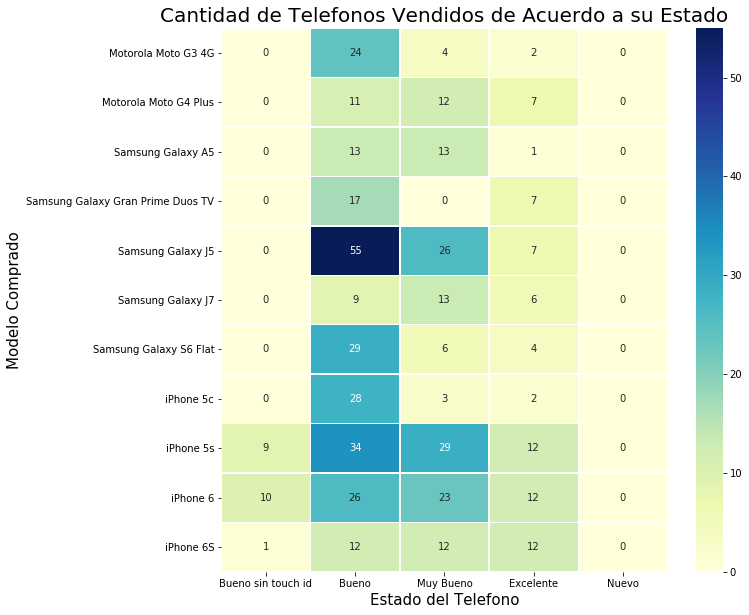

In [7]:
plt.figure(figsize=(10,10))
g = seaborn.heatmap(plot_df, cmap='YlGnBu', linewidths=0.5, annot=True)
g.set_title('Cantidad de Telefonos Vendidos de Acuerdo a su Estado', fontsize=20)
g.set_xlabel('Estado del Telefono', fontsize=15)
g.set_ylabel('Modelo Comprado', fontsize=15)

In [8]:
plot_df = pd.DataFrame(plot_df.stack())

In [9]:
plot_df.reset_index(inplace=True)
plot_df.columns = ['model', 'Estado del Telefono', 'amount_bought']

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

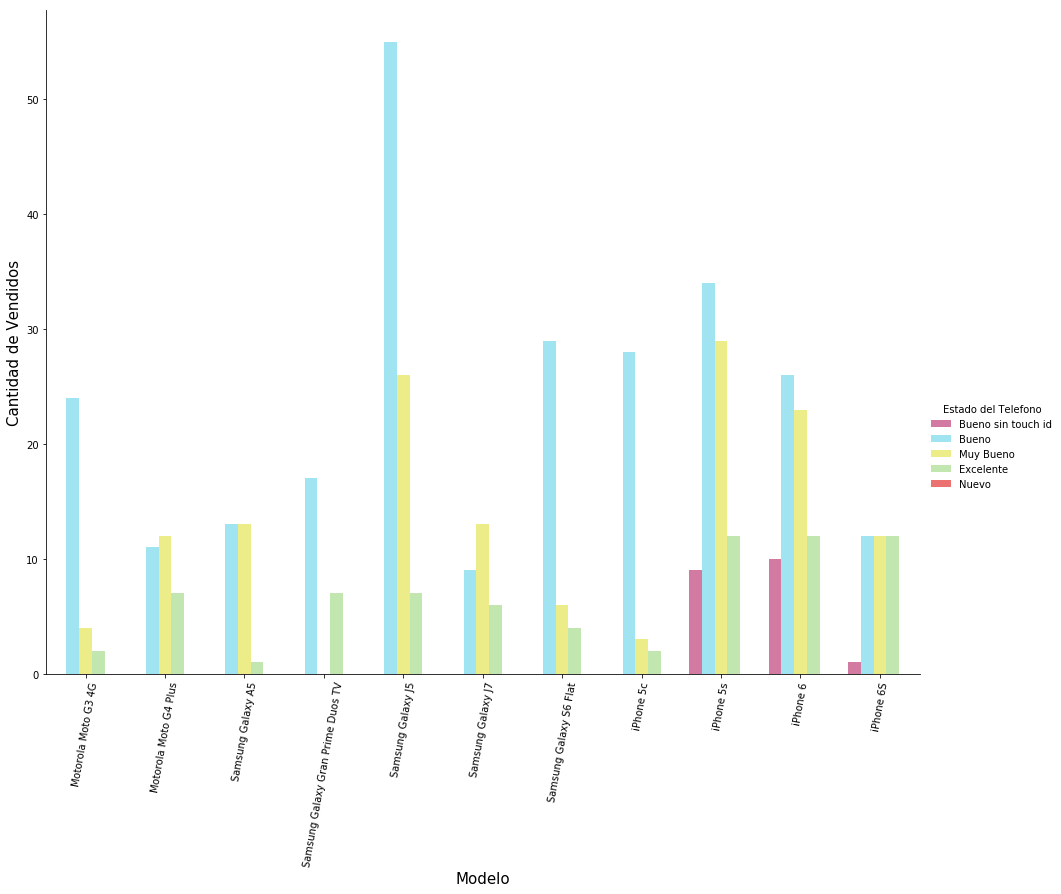

In [10]:
p1 = ["#E06C9F", "#93EDFF", "#FCFC79", "#BEEFA7", "#FF5E5B"]
# p1 = seaborn.palplot(seaborn.color_palette(flatui))

g2 = seaborn.factorplot(x='model', y='amount_bought', hue='Estado del Telefono', 
                        kind='bar', data=plot_df, log=False, 
                        size=10, aspect=1.3, palette=p1
                       )
g2.set_xlabels('Modelo', fontsize=15)
g2.set_ylabels('Cantidad de Vendidos', fontsize=15)
g2.set_titles('Cantidad de Telefonos Vendidos Por Estado')
#g.set_xticklabels(rotation=30)
plt.xticks(rotation=80)